# **Quantitative Exercise - Assessing the correlation between transparency and effectiveness of suggestions in recommender systems**

Our research aims at assessing the correlation between the transparency and effectiveness of suggestions in recommender systems.

After this set-up phase the survey process will start. For every user the following steps will be executed:

* Liked games by the user are gathered;
* Recommendations are computed;
* Recommendations and related explanation are shown;
* User evaluates the recommendation (E1) and the perceived understandability (T);
* User experiences the proposed game, watching a proposed trailer or gameplay;
* User re-evaluates the recommendation (E2).

This process will enable the gathering of three grades that will range from 1 to 6. They will be:
* E1:  the first evaluation of the recommendation. The user will choose a grade depending on how appropriate the recommendation is.
* T: the transparency evaluation. The user will express, using a grade ranging from 1 to 10, the level ofcomprehension about the reason that led the system to suggest the particular item.
* E2:  the second evaluation of the recommendation.  The user, after an experience of the suggested item, will evaluate again the goodness of the suggestion.

From these three values, the research will gather two metrics:
* The effectiveness level of the suggestion, measured as 6 minus the absolute difference between E1 and E2;
* The transparency level, measured as the level of T.

Considered what stated above and that we still do not have gathered any datda, we will artificially create a dataset with the following fields:


* ID_user;
* transparency_score, from 1 to 6;
* effectiveness_score_1, from 1 to 6;
* effectiveness_score_2, from 1 to 6.

We are expecting around 100 users, so 100 random data points will be generated.





In [46]:
import random

with open("dataset.csv", "w") as f:
  f.write("ID_user,transparency_score,effectiveness_score_1,effectiveness_score_2\n")
  for i in range(0, 100):

    ID_user = i
    transparency_score = random.randint(2, 6)
    effectiveness_score_1 = random.randint(1, 6)
    effectiveness_noise = 1 if transparency_score >= 4 else 2
    effectiveness_score_2 = random.randint(1 if effectiveness_score_1 <= effectiveness_noise else (effectiveness_score_1 - effectiveness_noise), 6 if effectiveness_score_1 >= (6 - effectiveness_noise) else (effectiveness_score_1 + effectiveness_noise))

    f.write(str(ID_user) + "," + str(transparency_score) + "," + str(effectiveness_score_1) + "," + str(effectiveness_score_2) + "\n")


The dataset has been designed with the following expected variables characteristics in mind:


* decent transparency results are achieved for explanations: this is why transparency score ranges from 2 to 6;
* recommendations are randomly proposed, thus we do not always expect high values: this is why effectiveness_score_1 ranges from 1 to 6;
* tryout of recommendations could modify the score provided by the user, more or less depending the value of perceived transparency, that's the reason of the equation reported above.



Given that we aim at just proving a correlation between transparency and effectiveness, we will not advance any causality hypothesis about them. Thus we can consider them both as independent.

Now we do some basic exploration of the created dataset

In [47]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.set_index("ID_user", inplace=True)
df.head()

,transparency_score,effectiveness_score_1,effectiveness_score_2
ID_user,,,
0,2,1,2
1,5,2,3
2,3,6,5
3,3,1,2
4,6,6,6


We display some mean values just to confirm our design hypotheses:

In [48]:
df["transparency_score"].mean()

3.99

In [49]:
df["effectiveness_score_1"].mean()

3.4

In [50]:
df["effectiveness_score_2"].mean()

3.67

In [51]:
(df["effectiveness_score_1"] - df["effectiveness_score_2"]).abs().mean()

0.87

We now visualize the distribution of data points

<AxesSubplot:>

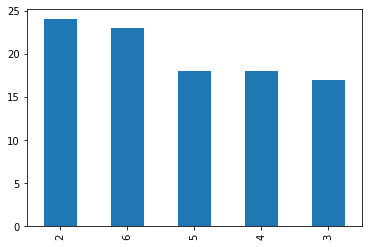

In [52]:
df['transparency_score'].value_counts().plot(kind='bar')

<AxesSubplot:>

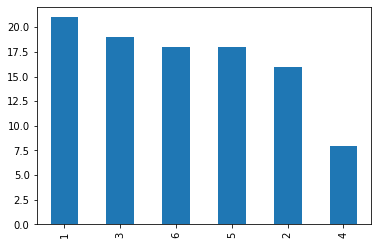

In [53]:
df['effectiveness_score_1'].value_counts().plot(kind='bar')

<AxesSubplot:>

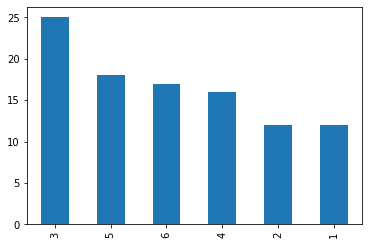

In [54]:
df['effectiveness_score_2'].value_counts().plot(kind='bar')

<AxesSubplot:>

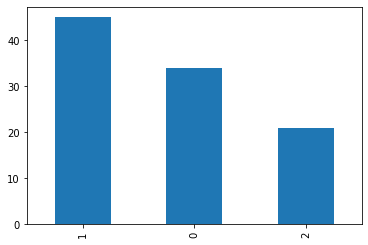

In [55]:
(df['effectiveness_score_1'] - df['effectiveness_score_2']).abs().value_counts().plot(kind='bar')

In [56]:
newDf = df.copy()
newDf["effectiveness_score"] = 6 - (newDf["effectiveness_score_1"] - newDf["effectiveness_score_2"]).abs()
newDf.drop(columns=["effectiveness_score_1", "effectiveness_score_2"], inplace=True)
newDf.head()

,transparency_score,effectiveness_score
ID_user,,
0,2,5
1,5,5
2,3,5
3,3,5
4,6,6


In [57]:
newDf = newDf.groupby(['transparency_score','effectiveness_score']).size().reset_index()
newDf.rename(columns = {0: 'frequency'}, inplace = True)
newDf.head()

,transparency_score,effectiveness_score,frequency
0,2,4,13
1,2,5,7
2,2,6,4
3,3,4,8
4,3,5,5


In order to assess the correlation first we plot the data on a scatter plot just to see if there is a direct dependency between the two variables.

We expect to see in the top right and bottom left graphs two straight diagonal lines. In practice, given the way we produced the data, we do not expect a line but rather the points to be more frequent in the diagonal.

In [58]:
import plotly.express as px
fig = px.scatter_matrix(newDf, dimensions=["transparency_score", "effectiveness_score"],size="frequency")
fig.show()

Now in order to effectively assess the correlation between the two variables we will compute two values: the Pearson and Spearman correlation metrics.

data1: mean=3.750 stdv=1.422
data2: mean=5.250 stdv=0.722


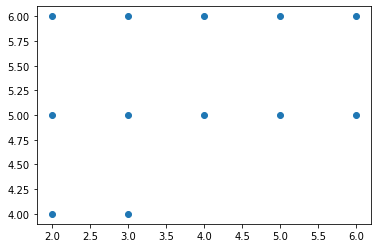

In [59]:
from numpy import mean
from numpy import std
from matplotlib import pyplot

data1 = newDf["transparency_score"]
data2 = newDf["effectiveness_score"]

print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

pyplot.scatter(data1, data2)
pyplot.show()

We measure the Pearson correlation:

In [60]:
from scipy.stats import pearsonr

corr, _ = pearsonr(data1, data2)
print('Pearson correlation: %.3f' % corr)

Pearson correlation: 0.305


We measure the Spearman correlation:

In [61]:
from scipy.stats import spearmanr

corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.277


A higher covariance between the two variables is a good sign of correlation.

In [62]:
from numpy import cov

covariance = cov(data1, data2)
print(covariance)

[[2.20454545 0.34090909]
 [0.34090909 0.56818182]]


Overall the two variables seem to be correlated. However, being the data randomly generated, the correlation does not appear to be so prominent.